In [1]:
from stereo3d import stereo3d_read_from_zips as std_read
from parsivel import pars_read_from_zips as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np 
stereo_datafolder = "/home/marcio/stage_project/data/Daily_raw_data_3D_stereo"
pars_datafolder = "/home/marcio/stage_project/data/Pars_1"
beg = 20230728000000
end = 20230731000000

# Read all the data and extract one event

In [2]:
# Read the main parsivel series
parsivel_series = pars_read(beg, end, pars_datafolder)

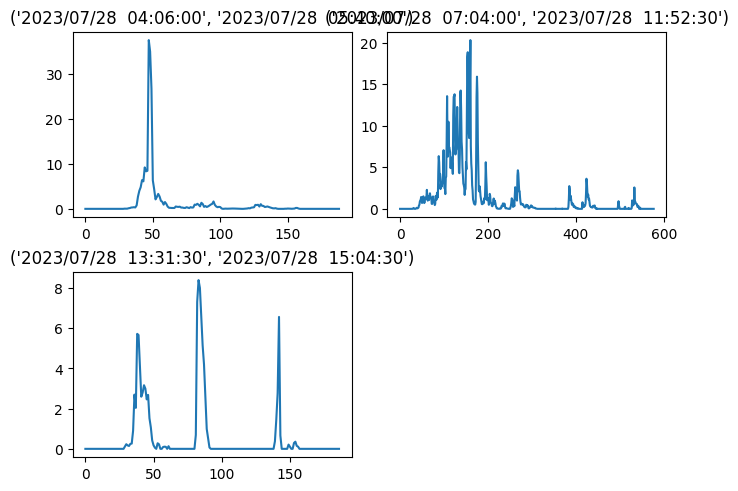

In [3]:
parsivel_events = parsivel_series.exstract_events(60, 15, 0.0001)
n = int(np.ceil(len(parsivel_events)**0.5))
figure = plt.figure()
figure.set_constrained_layout(True)
for i, event in enumerate(parsivel_events):
    ax = figure.add_subplot(n,n, i + 1)
    ax.plot(event.rain_rate)
    ax.set_title(event.duration_readable)

In [4]:
pars_event = parsivel_events[1]

#### Select event from Stereo 3D

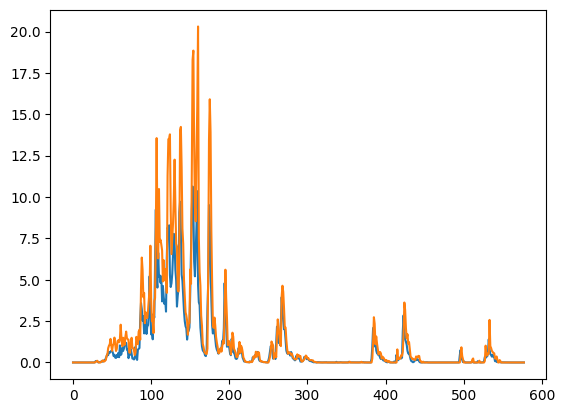

In [5]:
stereo_event = std_read(beg, end, stereo_datafolder).extract_events([pars_event.duration])[0]
figure, ax = plt.subplots()
ax.plot(stereo_event.rain_rate())
ax.plot(pars_event.rain_rate)

### Convert the Stereo3D series into the parsivel format

In [6]:
stereo_event = stereo_event.convert_to_parsivel()
type(stereo_event)

parsivel.parsivel_dataclass.ParsivelTimeSeries

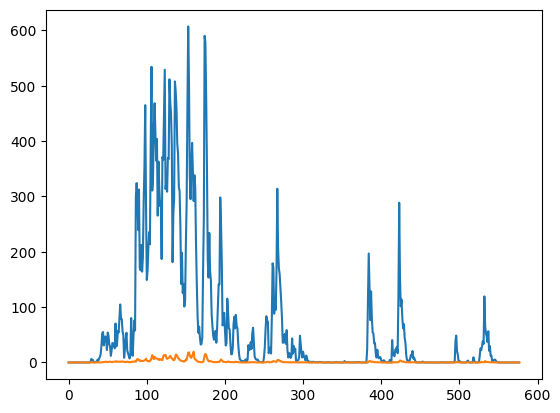

In [7]:
figure, ax = plt.subplots()
ax.plot(stereo_event.calculated_rate)
ax.plot(pars_event.calculated_rate)

In [8]:
stereo_event.matrix_for_event[:10, :10], pars_event.matrix_for_event[:10, :10]

(array([[  58,  290,  404,  251,  101,   61,   61,   26,   13,   20],
        [ 539, 2142, 3370, 3152, 2994, 2619, 2216, 1736, 1384, 1017],
        [ 325, 1588, 2951, 3469, 3706, 4094, 4530, 4518, 4451, 3978],
        [  92,  353,  954, 1280, 1567, 2101, 2493, 3037, 3303, 3696],
        [  17,   58,  149,  266,  405,  494,  710,  968, 1195, 1420],
        [   0,   12,   37,   32,   57,  107,  159,  200,  226,  294],
        [   3,    3,    5,   14,   25,   42,   74,  108,  139,  171],
        [   0,    2,    1,    1,   11,   10,   21,   41,   60,   77],
        [   0,    0,    2,    7,    4,    7,   15,   23,   30,   37],
        [   0,    1,    1,    0,    2,    1,    6,    9,   20,   21]]),
 array([[   0,    0,    0,    5,    0,    0,    0,    1,    0,    0],
        [   0,    0,    1,    2,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    6,    4,    0,    0,    0,    0,    0],
        [   0,    0,    0,   24,   17,    1,    0,    1,    0,    0],
        [   0,    

In [10]:
stereo_event.area_of_study

10000.0

### Plot the rain rate for the two devices

In [ ]:
figure, ax = plt.subplots(ncols=1, nrows=1)
figure.set_size_inches((8,4))
plot_rain_rate(ax, [parsivel_series, stereo_series])
ax.legend()

### Plot the graph Velocity vs diameter

In [ ]:
figure, axs = plt.subplots(ncols=2, nrows=1)
figure.set_tight_layout(tight=True)
figure.set_size_inches((16,6))
plot_vxd(axs, [parsivel_series, stereo_series])

### Plot the cumulative depth for the two devices

In [ ]:
figure, ax = plt.subplots(ncols=1, nrows=1)
figure.set_size_inches((10,6))
plot_cumulative_depth(ax,[parsivel_series, stereo_series])

### Plot the drop size distribution

In [ ]:
figure, ax = plt.subplots(ncols=1, nrows=1)
figure.set_size_inches((8,4))
plot_dsd(ax, [stereo_series, parsivel_series])

### Plot the number of drops in the time interval

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1)
figure.set_size_inches((18,4))
plot_ndrops(ax1, stereo_series)
plot_ndrops(ax3, stereo_series)
plot_ndrops(ax2, parsivel_series)
plot_ndrops(ax3, parsivel_series)